In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data() #Source(x) 28x28 matrix, target(y) numbers 0 to 9 (not needed)
x_train=x_train/255 # All values between 0 and 1
x_test=x_test/255 # All values between 0 and 1

print(x_test.shape)

(10000, 28, 28)


In [3]:
# Building the encoder
def encoder(x):
   
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(512,activation="relu" ))
    model.add(tf.keras.layers.Dense(256,activation="relu" ))
    model.add(tf.keras.layers.Dense(128,activation="relu" ))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.2))
    print(model.summary())
  
    return model(x)

In [4]:
# Building the decoder
def decoder():
   
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.BatchNormalization(input_shape=(128,)))
    model.add(tf.keras.layers.Dense(256,activation="relu" ))
    model.add(tf.keras.layers.Dense(512,activation="relu" ))
    model.add(tf.keras.layers.Dense(1024,activation="relu" ))
    model.add(tf.keras.layers.Dense(784,activation="sigmoid"))
    model.add(tf.keras.layers.Reshape((28,28)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.2))
    print(model.summary())
    
    return model

In [5]:
learning_rate=0.01

X = tf.placeholder("float", [None,28,28])
# Construct model
encoder_op= encoder(X)
dec=decoder()
decoder_op = dec(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

saver = tf.train.Saver()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
Total para

In [6]:
display_step = 1000
num_steps = 15000

# Start Training
# Start a new TF session
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    #Split the data in batches
    batches=np.split(x_train,250)
    
    # Training
    for i in range(0, num_steps):
        
        # Get the next batch 
        batch_x = batches[i%250]
        # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
        # Display logs per step
        if i!=0 and i % display_step == 0 or i == 1:
            print('Step %i: Minibatch Loss: %f' % (i, l))

    save_path = saver.save(sess, "/tmp/model.ckpt")
    print("Model saved in path: %s" % save_path)

Step 1: Minibatch Loss: 0.104059
Step 1000: Minibatch Loss: 0.020205
Step 2000: Minibatch Loss: 0.015503
Step 3000: Minibatch Loss: 0.013243
Step 4000: Minibatch Loss: 0.012219
Step 5000: Minibatch Loss: 0.010811
Step 6000: Minibatch Loss: 0.011032
Step 7000: Minibatch Loss: 0.010659
Step 8000: Minibatch Loss: 0.010017
Step 9000: Minibatch Loss: 0.010945
Step 10000: Minibatch Loss: 0.009596
Step 11000: Minibatch Loss: 0.009497
Step 12000: Minibatch Loss: 0.009803
Step 13000: Minibatch Loss: 0.009135
Step 14000: Minibatch Loss: 0.008658
Model saved in path: /tmp/model.ckpt


INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
Encoded/Compressed input: [ -0.8396146 , -7.443173e-25 ,... 0.06340617 ] - Compression: 83.67 %
Encoded/Compressed input: [ -0.8396146 , -7.443173e-25 ,... 0.06340617 ] - Compression: 83.67 %
Encoded/Compressed input: [ -0.8396146 , -7.443173e-25 ,... 0.06340617 ] - Compression: 83.67 %
Encoded/Compressed input: [ 3.3468626 , -7.443173e-25 ,... 0.06340617 ] - Compression: 83.67 %
Encoded/Compressed input: [ 4.1500053 , -7.443173e-25 ,... 0.06340617 ] - Compression: 83.67 %
Encoded/Compressed input: [ -0.8396146 , -7.443173e-25 ,... 0.06340617 ] - Compression: 83.67 %
Encoded/Compressed input: [ 4.1011333 , -7.443173e-25 ,... 0.06340617 ] - Compression: 83.67 %
Encoded/Compressed input: [ 1.8277118 , -7.443173e-25 ,... 0.06340617 ] - Compression: 83.67 %
Encoded/Compressed input: [ 4.894499 , -7.443173e-25 ,... 0.06340617 ] - Compression: 83.67 %
Encoded/Compressed input: [ 1.6121507 , -7.443173e-25 ,... 0.06340617 ] - Compressio

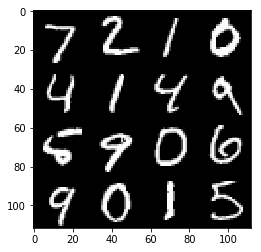

Reconstructed Images


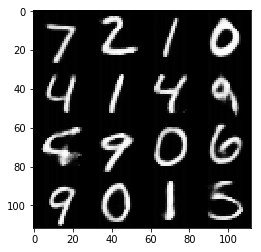

In [7]:
with tf.Session() as sess:

    # Run the initializer
    saver.restore(sess, "/tmp/model.ckpt")
    
    
    n = 4
    canvas_orig = np.empty((28 * n, 28 * n))
    canvas_recon = np.empty((28 * n, 28 * n))
    for i in range(n):
        # MNIST test set
        batch_xx = x_test[n*i:n*(i+1)]
        # Encode the digit image
        batch_x = sess.run(encoder_op, feed_dict={X: batch_xx})
    
        # Display Enconded/Compressed input
        for j in range(n):
            print("Encoded/Compressed input: [",batch_x[j][0],",", batch_x[j][1],
                  ",...",batch_x[j][len(batch_x)-1],"]", 
                  "- Compression:", round(100-(len(batch_x[j])*100/784),2),"%")
        
        # Numpy to Tensor
        batch_x = tf.convert_to_tensor(batch_x, dtype=tf.float32)

        # Decode the digit image
        d = dec(batch_x)
        g = sess.run(d)
        
        # Display original images
        for j in range(n):
            # Draw the original digits
            canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                batch_xx[j].reshape([28, 28])
        # Display reconstructed images
        for j in range(n):
            # Draw the reconstructed digits
            canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                g[j].reshape([28, 28])

    print("Original Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_orig, origin="upper", cmap="gray")
    plt.show()

    print("Reconstructed Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()